<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 2</h2></center>

<center><h3>Grading Table</h3></center>

<table>
  <col>
  <colgroup span="3"></colgroup>
  <colgroup span="2"></colgroup>
  <tr>
    <td rowspan="1"></td>
    <th colspan="1" scope="colgroup">Part 1</th>>
    <th colspan="1" scope="colgroup">Part 2</th>
    <th colspan="1" scope="colgroup">Total</th>
  </tr>
  <tr>
    <th scope="row">Points</th>
    <td>50</td>
    <td>50</td>
    <td>100</td>
  </tr>
</table>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import pandas as pd

In [213]:
from heapq import heapify, heappush, heappop
from collections import Counter
import sklearn

# Part 1 - K Nearest Neighbors

We will use the famous iris dataset in this part.

In [3]:
df = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])

### Step 1

Split the dataset into train and test sets.

In [4]:
y = df['Class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [5]:
X = df
X.drop(['Class'], axis = 1, inplace = True)
X

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Step 2

Standardize the dataset

In [105]:
scaler = preprocessing.StandardScaler().fit(X_training)
X_training_scaled = scaler.transform(X_training)
X_test_scaled = scaler.transform(X_test)

### Step 3

Write your custom KNN class

In [106]:
class CustomKNN:
    def __init__(self):
        pass

    def fit(self, X, y, k):
        self.X = X
        self.y = y
        self.k = k

    def predict(self, X_test_point):
        heap = []
        heapify(heap)
        for i in range(self.X.shape[0]):
            heappush(heap, (self.euclidean_distance(self.X[i], X_test_point), self.y.values[i]))
        neighbors_arr = []
        for j in range(self.k):
            neighbors_arr.append(heappop(heap)[1])
        return self.most_common_element(neighbors_arr)

    def score(self, X_test, y_test):
        test_size = X_test.shape[0]
        accurate = 0
        for i in range(test_size):
            if self.predict(X_test[i]) == y_test.values[i]:
                accurate += 1
        return accurate / test_size

    def most_common_element(self, arr):
        data = Counter(arr)
        return data.most_common(1)[0][0]
    
    def euclidean_distance(self, x1, x2):
        return np.sum((x1 - x2)**2)

### Step 4

Fit the training data to model

In [112]:
myKNN = CustomKNN()
myKNN.fit(X_training_scaled, y_training, 5)

### Step 5

Evaluate the accuracy

In [113]:
myKNN.score(X_test_scaled, y_test)

0.9736842105263158

In [114]:
for i in range(1, 11):
    myKNN.fit(X_training_scaled, y_training, i)
    print(f"k: {i}, score: {myKNN.score(X_test_scaled, y_test)}")

k: 1, score: 0.9736842105263158
k: 2, score: 0.9736842105263158
k: 3, score: 1.0
k: 4, score: 0.9736842105263158
k: 5, score: 0.9736842105263158
k: 6, score: 0.9736842105263158
k: 7, score: 0.9736842105263158
k: 8, score: 0.9736842105263158
k: 9, score: 1.0
k: 10, score: 1.0


### Step 6

Use sklearn's KNN classifier and compare the results

In [110]:
from sklearn.neighbors import KNeighborsClassifier

k: 1 CustomKNN: 0.9736842105263158 sklearn: 0.9736842105263158
k: 2 CustomKNN: 0.9736842105263158 sklearn: 0.9736842105263158
k: 3 CustomKNN: 1.0 sklearn: 1.0
k: 4 CustomKNN: 0.9736842105263158 sklearn: 1.0
k: 5 CustomKNN: 0.9736842105263158 sklearn: 0.9736842105263158
k: 6 CustomKNN: 0.9736842105263158 sklearn: 1.0
k: 7 CustomKNN: 0.9736842105263158 sklearn: 0.9736842105263158
k: 8 CustomKNN: 0.9736842105263158 sklearn: 1.0
k: 9 CustomKNN: 1.0 sklearn: 1.0
k: 10 CustomKNN: 1.0 sklearn: 1.0


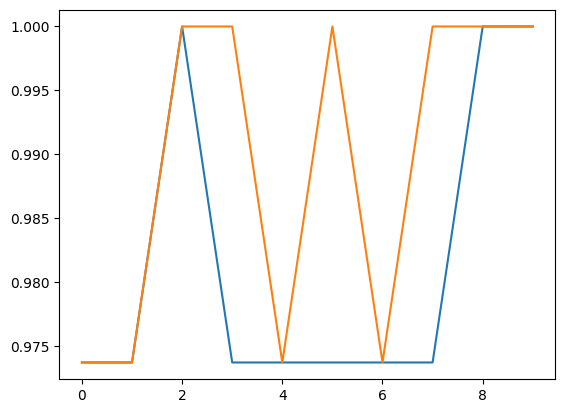

In [121]:
custom_scores = []
sklearn_scores = []
for i in range(1, 11):
    myKNN.fit(X_training_scaled, y_training, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_training_scaled, y_training)
    custom_score = myKNN.score(X_test_scaled, y_test)
    sklearn_score = classifier.score(X_test_scaled, y_test)
    custom_scores.append(custom_score)
    sklearn_scores.append(sklearn_score)
    print(f"k: {i} CustomKNN: {custom_score} sklearn: {sklearn_score}")
plt.plot(custom_scores)
plt.plot(sklearn_scores)

### Step 7

We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

In [127]:
X_new_test = [[4.5, 3.0, 1.5, 0.5], [7.0, 3.0, 5.0, 1.5], [6.0, 2.5, 5.0, 2.0], [7.0, 3.0, 4.5, 1.0], [6.0, 2.0, 5.0, 1.5]]
X_new_test_scaled = scaler.transform(X_new_test)
sklearn_arr = classifier.predict(X_new_test_scaled)
for i, data_point in enumerate(X_new_test_scaled):
    print(f"CustomKNN: {myKNN.predict(data_point)} sklearn: {sklearn_arr[i]}")

CustomKNN: Iris-setosa sklearn: Iris-setosa
CustomKNN: Iris-versicolor sklearn: Iris-versicolor
CustomKNN: Iris-virginica sklearn: Iris-virginica
CustomKNN: Iris-versicolor sklearn: Iris-versicolor
CustomKNN: Iris-versicolor sklearn: Iris-versicolor


# Part 2 - K-Means Clustering

## Dataset
<br>
We use dataset from https://www.kaggle.com/kandij/mall-customers throughout this notebook.

In [196]:
df = pd.read_csv("segmented_customers-2.csv")
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Step 1
<br>
For this part, we will only use Age and Spending Score columns.
<br>
Plot the dataframe so that "Age" column is on the x axis and "Spending Score (1-100)" is on the y axis.

In [197]:
df.drop(["Gender", "Annual Income (k$)"], axis = 1, inplace = True)
df.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [199]:
scaler2 = preprocessing.StandardScaler().fit(df)
df_scaled = scaler2.transform(df)
df_scaled

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

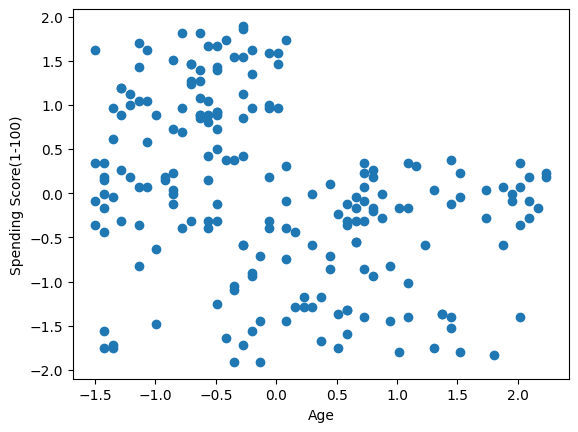

In [201]:
plt.scatter(df_scaled[:,0], df_scaled[:,1])
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

### Step 2
<br>
Implement your own simple Kmeans algorithm without using pre-implemented libraries for KMeans. You can 
refer to the structure below while structuring your code. You do not have to use the same structure. 
Any type of initialization method for your centroids is accepted. You will solely be graded on whether or not your algorithm performs as expected, we will not take the accuracy into account as long as the algorithm gives meaningful results.

In [177]:
arr = [[] for i in range(3)]
arr

[[], [], []]

In [181]:
def initialization(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False), :]


def kmeans_loss(cluster_arr, centroids):
    total_loss = 0
    for i, cluster in enumerate(cluster_arr):
        for point in cluster:
            total_loss += point_distance(point, centroids[i])
    return total_loss


def kmeans(data, k):
    centroids = initialization(data, k)
    while True:
        cluster_arr = [[] for i in range(k)]
        for data_point in data:
            min_distance = np.Infinity
            min_distance_index = 0
            for j in range(k):
                p_distance = point_distance(centroids[j], data_point)
                if p_distance < min_distance:
                    min_distance = p_distance
                    min_distance_index = j
            cluster_arr[min_distance_index].append(data_point)
        new_centroids = [np.mean(cluster, axis=0) for cluster in cluster_arr]
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return cluster_arr, centroids
        

def point_distance(p1, p2):
    return np.sum((p1 - p2)**2)**0.5
            
        



### Step 3
<br>
After you complete your algorithm, test it for number of clusters between 1-15. Use elbow method to decide on the
best number of clusters. For the best number of clusters you chose, visualize the clusters and centroids. Comment on your results, what improvements can be made on the algorithm?

In [182]:
cluster_arr, centroids = kmeans(df_scaled, 4)
print(kmeans_loss(cluster_arr, centroids))

121.76896385820457


In [226]:
loss_arr = []
for i in range(1, 16):
    temp_loss_arr = []
    for j in range(10):
        cluster_arr, centroids = kmeans(df_scaled, i)
        temp_loss_arr.append(kmeans_loss(cluster_arr, centroids))
    loss_arr.append(min(temp_loss_arr))

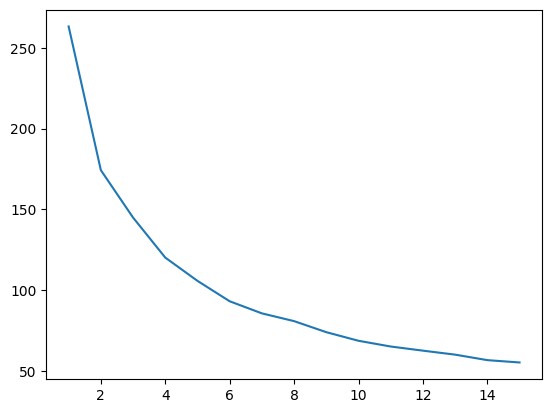

In [227]:
plt.plot(range(1,16), loss_arr)
plt.show()

In [228]:
cluster_arr, centroids = kmeans(df_scaled, 4)

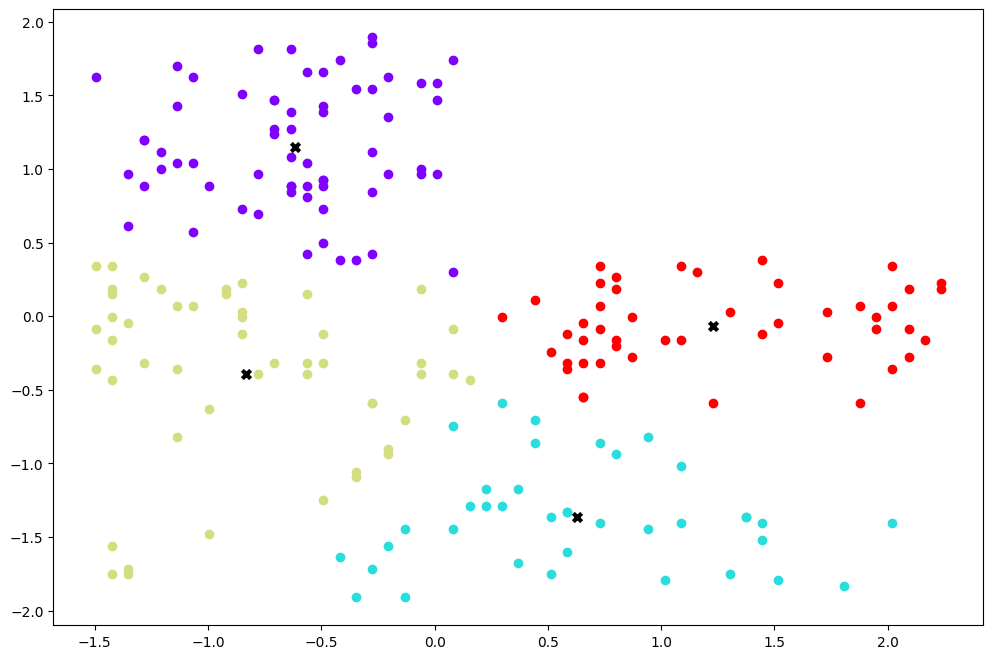

In [229]:
fig, ax = plt.subplots(figsize=(12,8))
color = cm.rainbow(np.linspace(0, 1, 4))

for i, cluster in enumerate(cluster_arr):
    for point in cluster:
        ax.scatter(point[0], point[1], color = color[i])

for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], marker='x', color='black', linewidth=3)
plt.show()

### Step 4
<br>
Use scikit-learn's KMeans class to compare your results with the optimized KMeans algrorithm. Compare it for number of clusters between 1-15 and plot the inertias (hint: you can use scikit-learn's "inertia_" parameter.). Comment on your results.  

In [230]:
scikit_loss_arr = []
for i in range(1, 16):
    temp_loss_arr = []
    for j in range(10):
        scikit_clustering=sklearn.cluster.KMeans(n_clusters=i)
        scikit_clusters = scikit_clustering.fit_predict(df_scaled)
        temp_loss_arr.append(scikit_clustering.inertia_)
    scikit_loss_arr.append(min(temp_loss_arr))

In [233]:
scikit_clustering=sklearn.cluster.KMeans(n_clusters=4)
sp_scikit_clusters = scikit_clustering.fit_predict(df_scaled)
sp_scikit_centroids = scikit_clustering.cluster_centers_

In [243]:
centroids

[array([-0.61415725,  1.14971545]),
 array([ 0.62833625, -1.36651894]),
 array([-0.8346466 , -0.39442706]),
 array([ 1.22927178, -0.06558366])]

In [242]:
sp_scikit_centroids

array([[ 0.62833625, -1.36651894],
       [-0.61415725,  1.14971545],
       [-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366]])

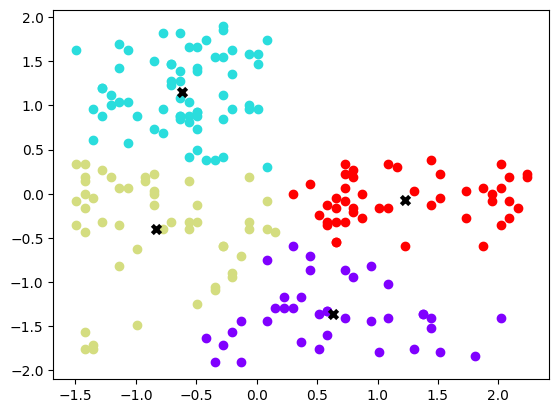

In [241]:
for i, point in enumerate(df_scaled):
    plt.scatter(point[0], point[1], color = color[scikit_clustering.labels_[i]])

for centroid in sp_scikit_centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', linewidth=3)
plt.show()

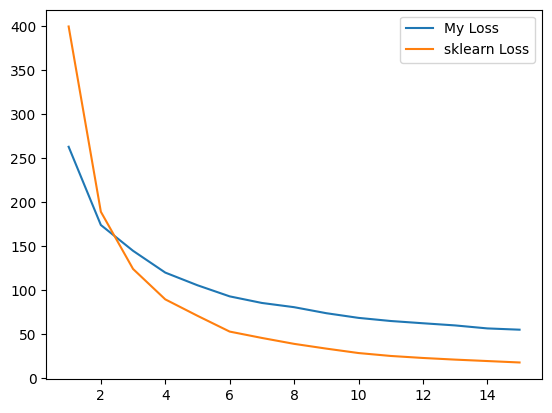

In [232]:
plt.plot(range(1,16), loss_arr, label='My Loss')
plt.plot(range(1,16), scikit_loss_arr, label='sklearn Loss')
plt.legend()
plt.show()